In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Generate Regression Data

In [ ]:
from sklearn.datasets import make_regression
X,y = make_regression(
    n_samples=500, 
    n_features=1,
    n_informative=1, 
    noise=25, 
    random_state=42)


Data Visualization

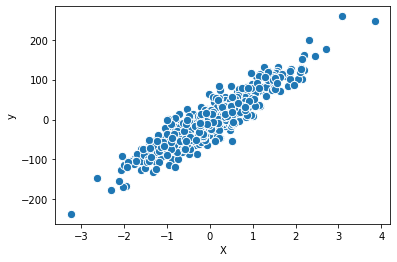

In [ ]:
plt.scatter( X,y, facecolor='tab:blue', edgecolor = 'white', s= 70)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Implement


In [ ]:
class LinearRegression_GD:
  def __init__(self, eta=0.001, max_iter=20, random_state=42):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = []


  def predict(self, X):
    return np.dot(X, self.w[1:])+self.w[0]


  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      for j in range(X.shape[1]):
        delta = 0.0
        for i in range(X.shape[0]):
          delta += self.eta * diff[i] * X[i][j]
        self.w[j + 1] += delta
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

In [ ]:
reg_GD = LinearRegression_GD(eta=0.001, max_iter=20, random_state=42)
reg_GD.fit(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

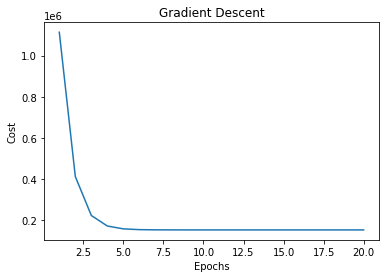

In [ ]:
plt.plot(range(1,len(reg_GD.costs)+1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show

In [ ]:
reg_GD.costs

[1113420.8027713355,
 413159.7780355038,
 224109.13732091122,
 173063.27302347805,
 159278.41210464464,
 155555.35937795957,
 154549.70944706665,
 154278.03957172047,
 154204.64235305716,
 154184.81074656243,
 154179.45187539776,
 154178.00369375062,
 154177.6123085017,
 154177.50652568188,
 154177.47793313372,
 154177.47020427178,
 154177.46811496944,
 154177.46755015175,
 154177.46739745318,
 154177.46735616936]

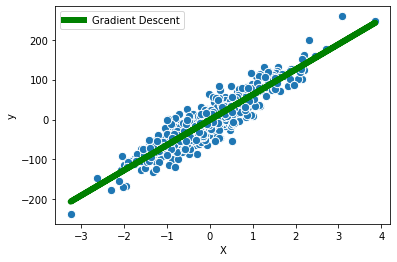

In [ ]:
plt.scatter(X, y, facecolor='tab:blue', edgecolor='white', s =70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
w_GD = reg_GD.w
w_GD

array([-0.9794002 , 63.18592509])

Linear Regress ( Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg_SGD = SGDRegressor (eta0=0.001, max_iter=20, random_state=42, learning_rate= 'constant')
reg_SGD.fit(X, y)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_NE = LinearRegression()
reg_NE.fit(X, y)


LinearRegression()

In [ ]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([-1.02681553, 63.08630288])

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([-0.97941333, 63.18605572])

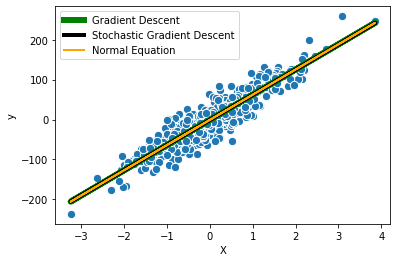

In [ ]:
plt.scatter(X, y, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X, reg_GD.predict(X), color='green', lw=6, label='Gradient Descent')
plt.plot(X, reg_SGD.predict(X), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X, reg_NE.predict(X), color='orange', lw=2, label='Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2


In [ ]:
y_pred_GD = reg_GD.predict(X)
y_pred_SGD = reg_SGD.predict(X)
y_pred_NE = reg_NE.predict(X)

In [ ]:
print('MAE of GD:', round(MAE(y, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y, y_pred_NE), 6))


MAE of GD: 19.705208
MAE of SGD: 19.705117
MAE of NE: 19.70521


In [ ]:
print('MSE of GD:', round(MSE(y, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y, y_pred_NE), 6))


MSE of GD: 616.709869
MSE of SGD: 616.721743
MSE of NE: 616.709869


In [ ]:
print('R2 of GD:', round(R2 (y, y_pred_GD), 6))
print('R2 of SGD:', round(R2 (y, y_pred_SGD), 6))
print('R2 of NE:', round(R2 (y, y_pred_NE), 6))


R2 of GD: 0.861513
R2 of SGD: 0.861511
R2 of NE: 0.861513


In [ ]:
reg_GD2 = LinearRegression_GD(eta=0.005, max_iter=20, random_state=42)
reg_GD2.fit(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

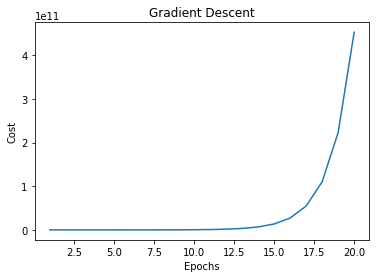

In [ ]:
plt.plot(range(1,len(reg_GD2.costs)+1), reg_GD2.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show

In [ ]:
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0,
480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0,
391.2, 390.8])

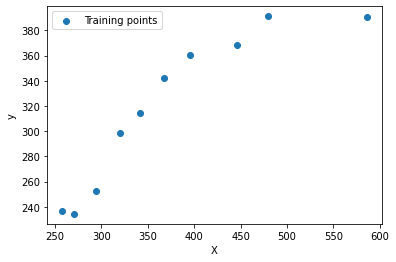

In [ ]:
plt.scatter(X, y, label='Training points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

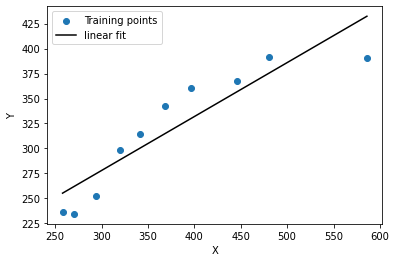

In [ ]:
plt.scatter(X, y, label = 'Training points')
plt.plot(X, lr.predict(X), color = 'black', label = 'linear fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr = LinearRegression()
pr.fit(X_quad, y)

LinearRegression()

In [ ]:
X_test = np.arange(250, 600, 10)[:, np.newaxis]
y_pred_linear = lr.predict(X_test)
y_pred_quad = pr.predict(quadratic.fit_transform(X_test))

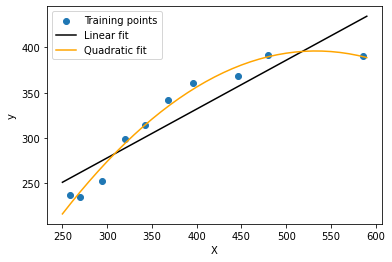

In [ ]:
plt.scatter(X, y, label='Training points')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_test, y_pred_linear, label='Linear fit', c='black')
plt.plot(X_test, y_pred_quad, label='Quadratic fit', c='orange')
plt.legend()
plt.show()